In [ ]:
import os
path = os.getcwd()

if path[1:5] == 'Home':
    %run /Home/siv30/wad005/master/GRB/src/harvest_matlab_data.ipynb
    %run /Home/siv30/wad005/master/GRB/src/background_rates.ipynb


else:
    %run /Users/andreas/phys/master/GRB/src/harvest_matlab_data.ipynb
    %run /Users/andreas/phys/master/GRB/src/background_rates.ipynb

# Notes
    COUNTRATES
    --------------
    cr at T0-s = 9334 cts/s
    ratemeter = ~cts/s for time 

In [3]:
def plot_lightcurve(tus, start=None, stop=None):
  # Convert trigger times from seconds to minutes
     
    if start and stop != None:
        # Create a histogram of the trigger times
        plt.hist(tus, bins=100, range=(start, stop))
    else:
        plt.hist(tus, bins=100)
    # Set the x-axis label
    plt.xlabel('Time (s)')

    # Set the y-axis label
    plt.ylabel('Number of triggers')

    # Show the plot
    plt.show()

In [4]:
df = harvest_data(fn='2019_2_6_3_49_28',T0='2019-02-06T03:49:28.525')
T0=datetime.fromisoformat('2019-02-06T03:49:28.525')
tus = df['tus'].to_numpy(dtype=np.float64)

dau/det starting from index 1
tus array given in seconds
safety time:  0.391 % removed
sorted by tus (s)


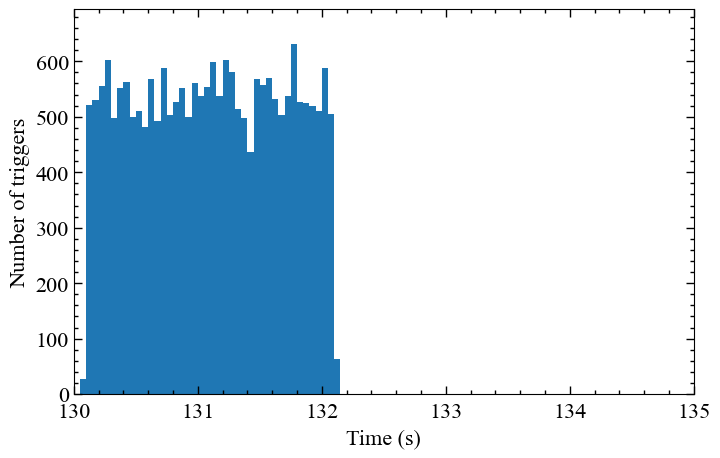

In [6]:
plot_lightcurve(tus,start=130,stop=135)

2019-02-06 03:51:38.525000
cr = 10762.229917077262
exposure 2.0092490279999993
tus array OK ...


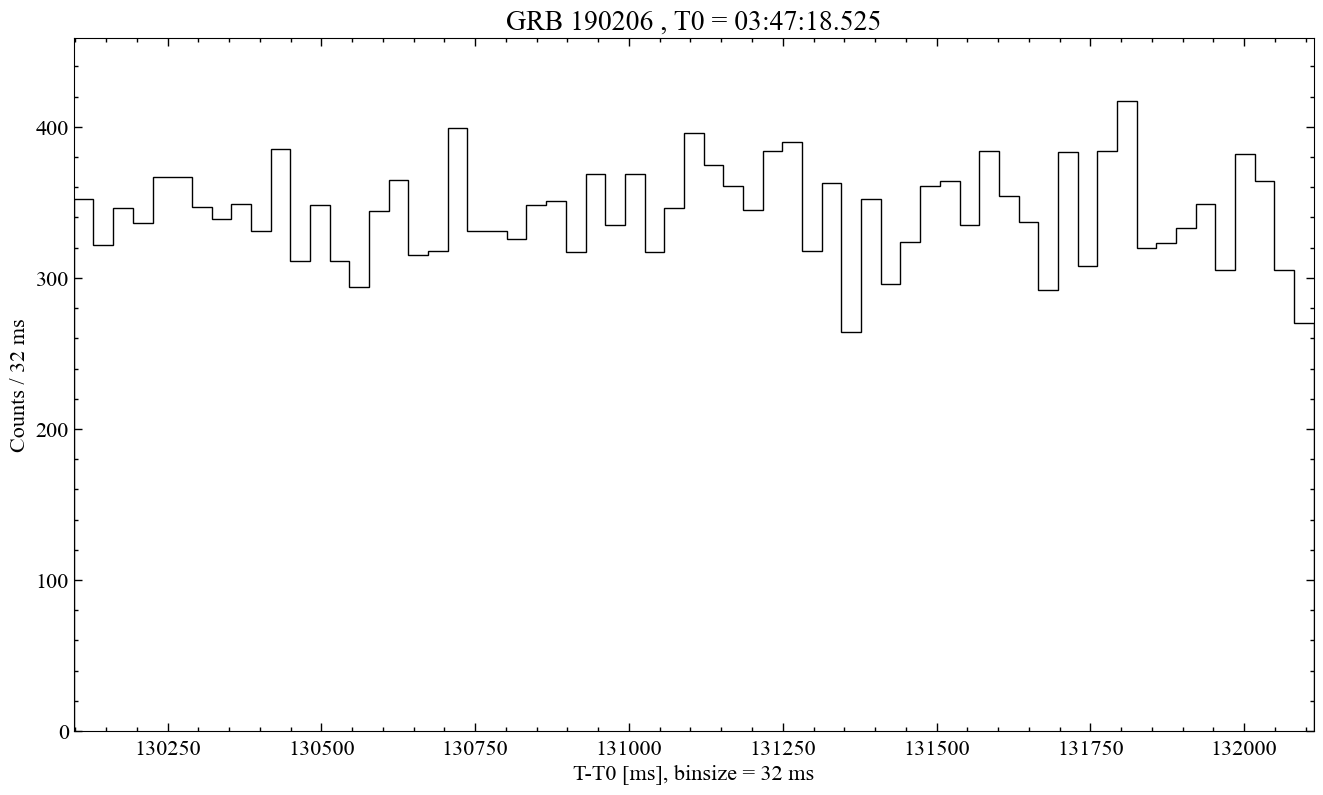

In [7]:
#first check is for the bkg at T0-92s
i,j=find_nearest(tus,130),find_nearest(tus,133)
counts = len(tus[i:j])
exposure = tus[i:j][-1]-tus[i:j][0]
cr = counts/exposure
print(T0+timedelta(seconds=130))
print('cr =',cr)
print('exposure',exposure)
plot_HED(tus_arr=tus[i:j]*1e6,binsize=32,T0=T0-timedelta(seconds=130))